# Predicting Heart Disease

https://nbviewer.org/urls/community.dataquest.io/uploads/short-url/sUvoo4IMdWGmUsmAtvj4oueTEeQ.ipynb

## Introduction

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Set the maximum column width
pd.set_option('display.max_colwidth', 100)
# Magic function to display plots in notebook
%matplotlib inline

In [2]:
data = pd.read_csv('heart_disease_prediction.csv')

In [3]:
print(data.head(5))

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [15]:
print(f'Number of features: {data.shape[1]}')
print(f'Number of observations: {data.shape[0]}')


Number of features: 12
Number of observations: 918


## EDA: Descriptive Statistics

In [16]:

print(data.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [7]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
print(data['Age'].mean())

53.510893246187365


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The average age of patients is ~53 years.
The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.
RestingBP and Cholesterol have a minimum value of zero.
There don't seem to be any missing values in these columns.

## EDA: Visualizations

Calculate the number of missing values in all columns.

In [18]:
print(data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


We'll create a bar chart for each categorical column in the heart_df dataset, including FastingBS and HeartDisease. These charts will display the number of rows for each category in the column, with appropriate axis labels, data labels, and a title to make the visualization clear and informative.

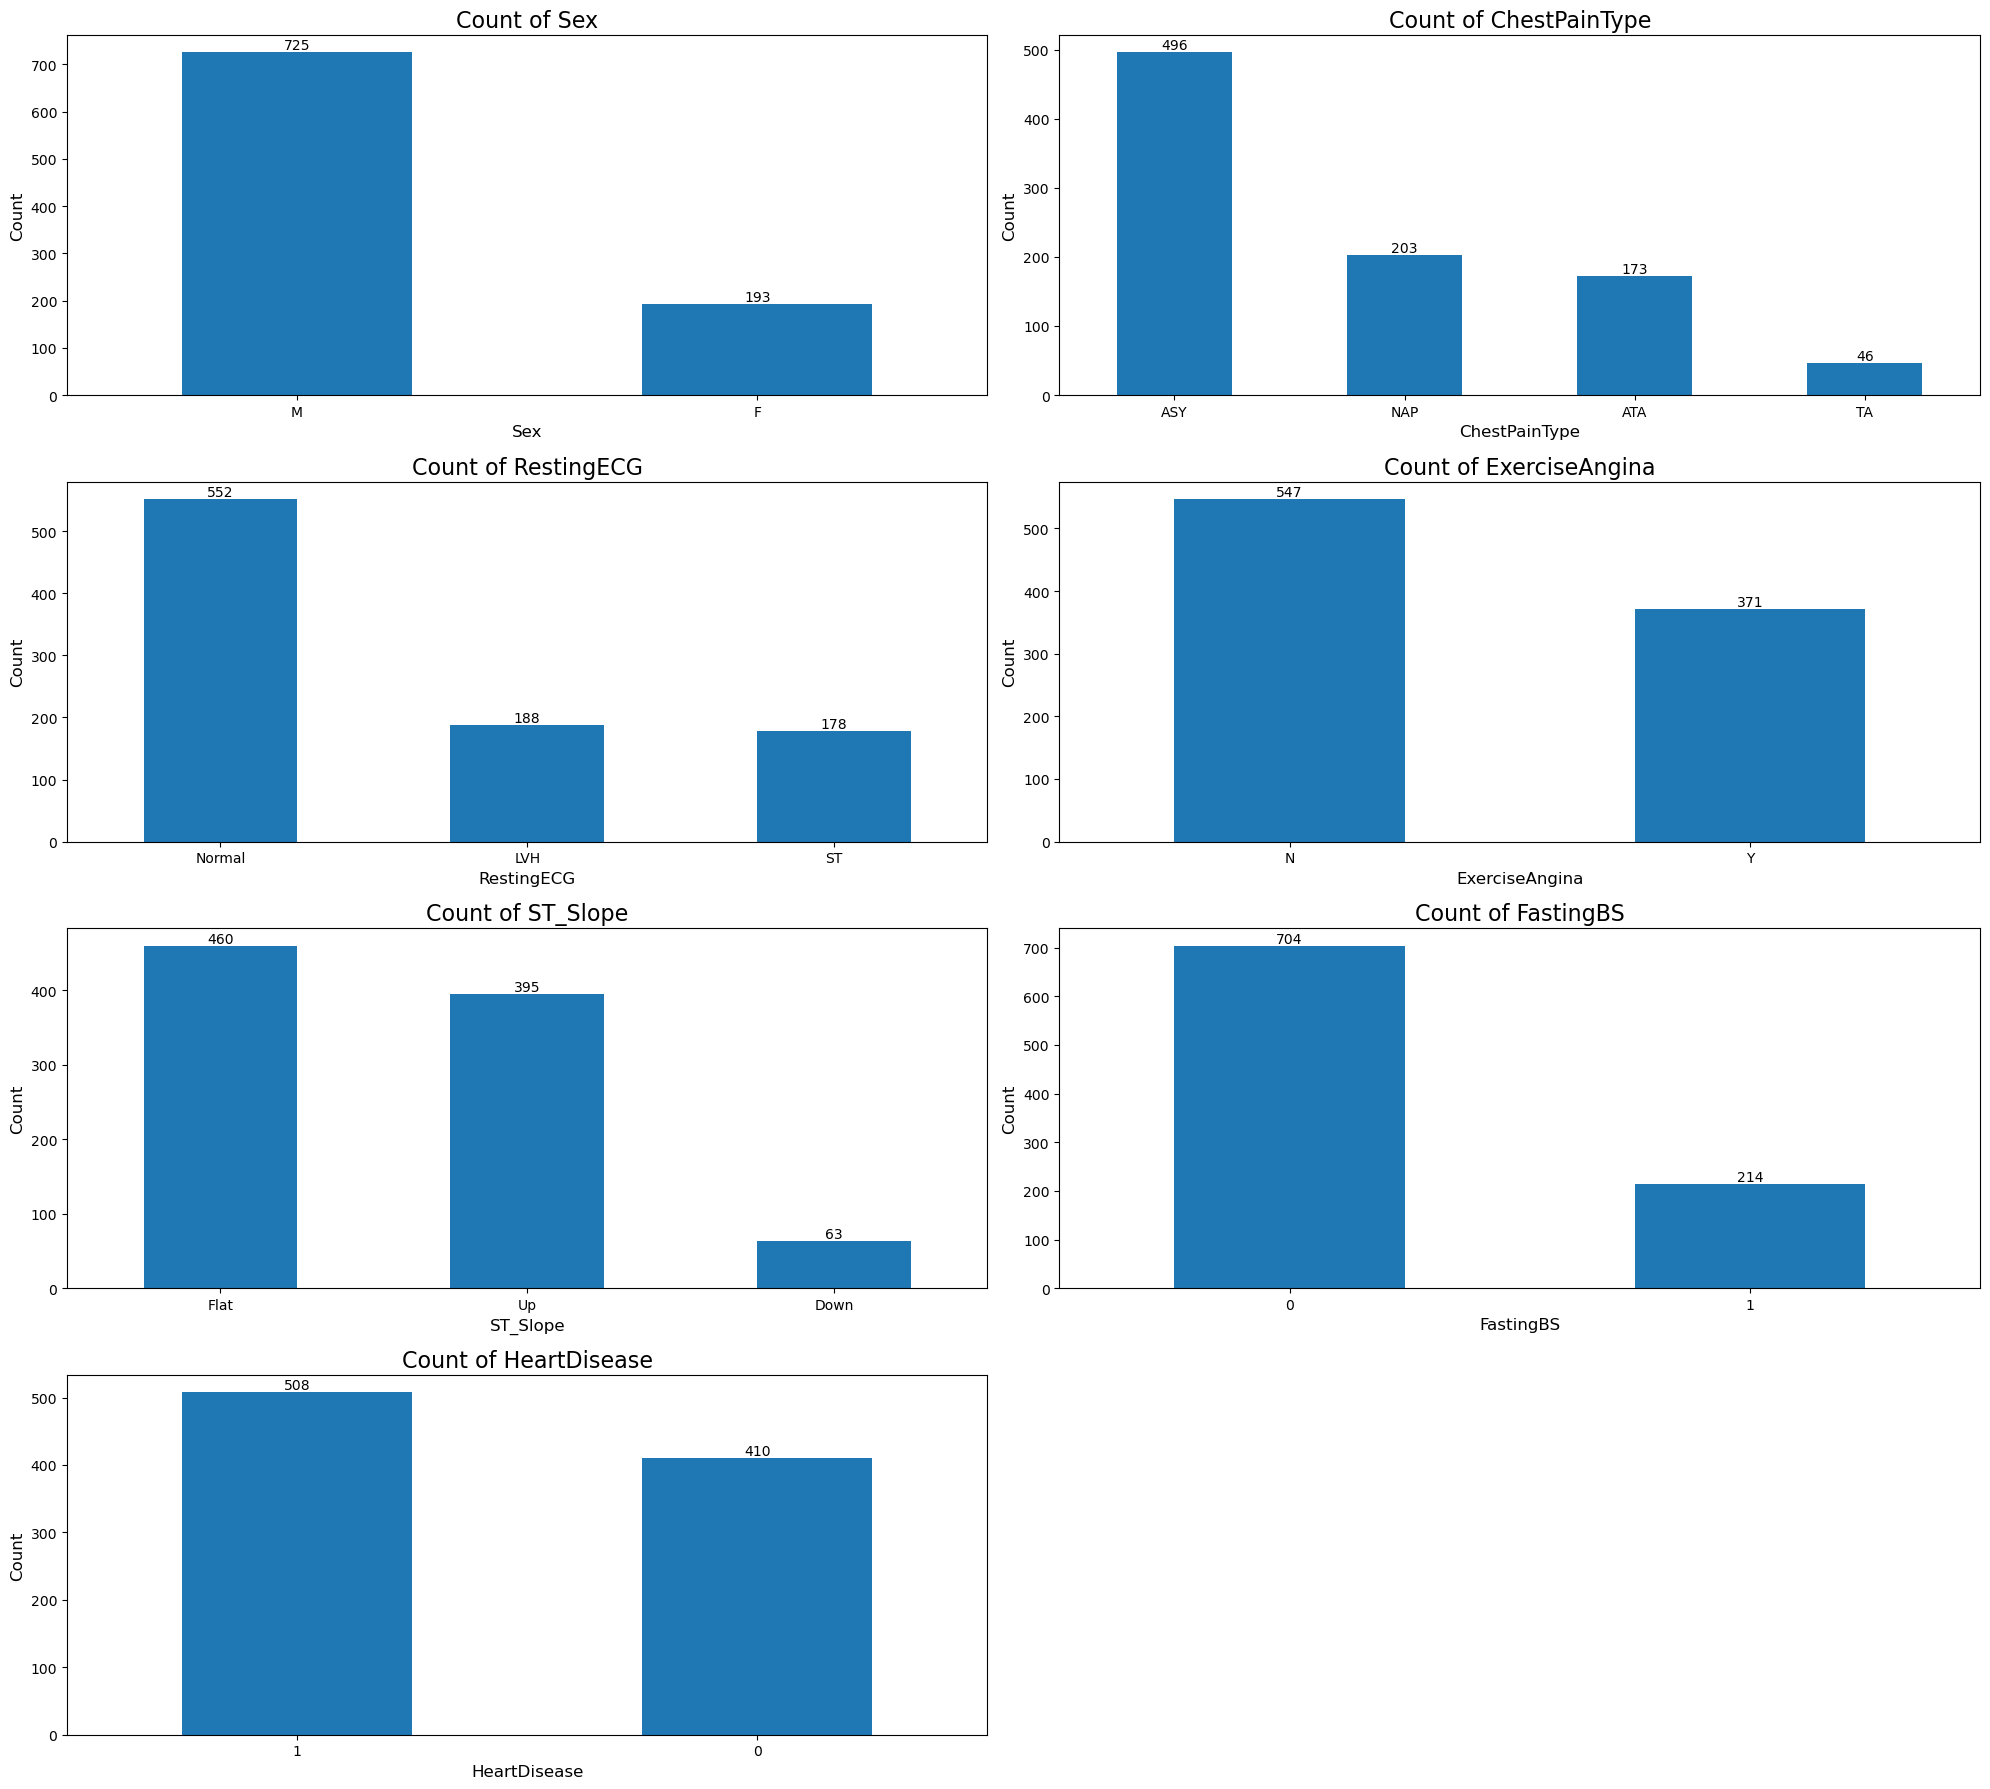

In [24]:
# Create a list of categorical columns
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']

# Define number of rows and columns for the subplots
num_rows = 4
num_cols = 2

# Set up the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20,18))

# Loop over each categorical column to create a bar plot
for i, col in enumerate(cat_cols):
    # Calculate the row and column index for the current subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Count the number of rows for each category in the column (frequency distribution)
    counts = data[col].value_counts()
    
    # Create a bar plot of the counts in the current subplot
    ax = counts.plot(kind='bar', rot=0, color='#1f77b4', ax=axes[row_idx, col_idx])
    
    # Add labels for the x and y axes
    ax.set_xlabel(col, size=12)
    ax.set_ylabel('Count', size=12)
    
    # Add a title for the plot
    ax.set_title(f'Count of {col}', size=16)
    
    # Add data labels to the bars
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')

# If there are not enough columns to fill in the last row, create a blank plot
if len(cat_cols) % num_cols != 0:
    blank_ax = axes[num_rows-1, num_cols-1]
    blank_ax.axis('off')

# Adjust the spacing between subplots
fig.tight_layout()
plt.show()


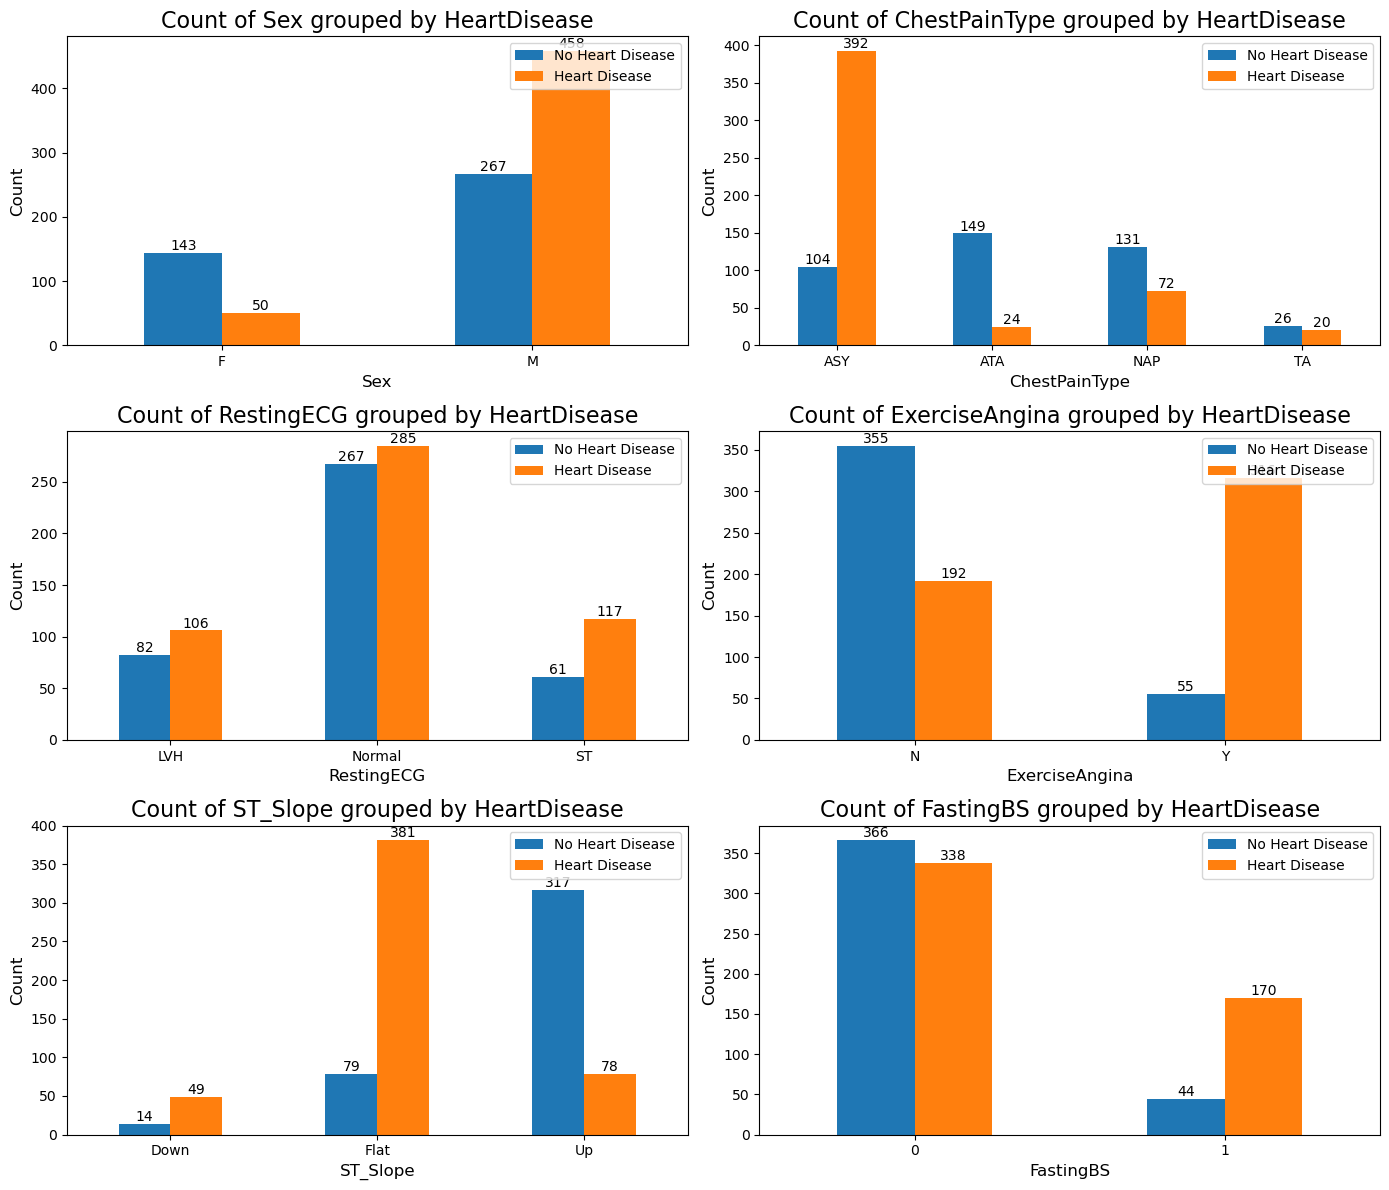

In [26]:
# Exclude 'HeartDisease' column from 'cat_cols' for grouping
cat_cols_2 = cat_cols[:-1]

# Set up figure and axis objects
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))

# Loop over categorical columns and create bar chart for each
for i, col in enumerate(cat_cols_2):
    # Calculate the row and column index for the current subplot
    row_idx = i // 2
    col_idx = i % 2
    
    # Group data by HeartDisease and the categorical column
    counts = data.groupby(['HeartDisease', col]).size().reset_index(name='count')
    
    # Create bar chart
    ax = counts.pivot(index=col, columns='HeartDisease', values='count').plot(kind='bar', ax=axes[row_idx, col_idx], rot=0)
    
    # Add labels and title
    ax.set_xlabel(col, size=12)
    ax.set_ylabel('Count', size=12)
    ax.set_title(f'Count of {col} grouped by HeartDisease', size=16)
    
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], loc='upper right')
    
    # Add data labels above each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, 5), 
                    textcoords='offset points', ha='center', va='center')
        
plt.tight_layout()
plt.show()

## Data Cleaning

In [28]:
print(f"Number of rows that have 0 values for RestingBP: {(data['RestingBP'] == 0).sum()}")
print(f"Number of rows that have 0 values for Cholesterol: {(data['Cholesterol'] == 0).sum()}")

Number of rows that have 0 values for RestingBP: 1
Number of rows that have 0 values for Cholesterol: 172


In [30]:
# Create a copy of the original dataframe
heart_clean_df = data.copy()

# Impute 0 values in RestingBP with median value of the column grouped by HeartDisease
heart_clean_df['RestingBP'] = heart_clean_df.groupby('HeartDisease')['RestingBP'].apply(lambda x: x.replace(0, x.median()))

# Impute 0 values in Cholesterol with median value of the column grouped by HeartDisease
heart_clean_df['Cholesterol'] = heart_clean_df.groupby('HeartDisease')['Cholesterol'].apply(lambda x: x.replace(0, x.median()))

##  Feature Selection

In [31]:
# Convert categorical variable into dummy variables
heart_clean_df = pd.get_dummies(heart_clean_df, drop_first=True)

# View results
heart_clean_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [32]:
corr_mat = abs(heart_clean_df.corr())

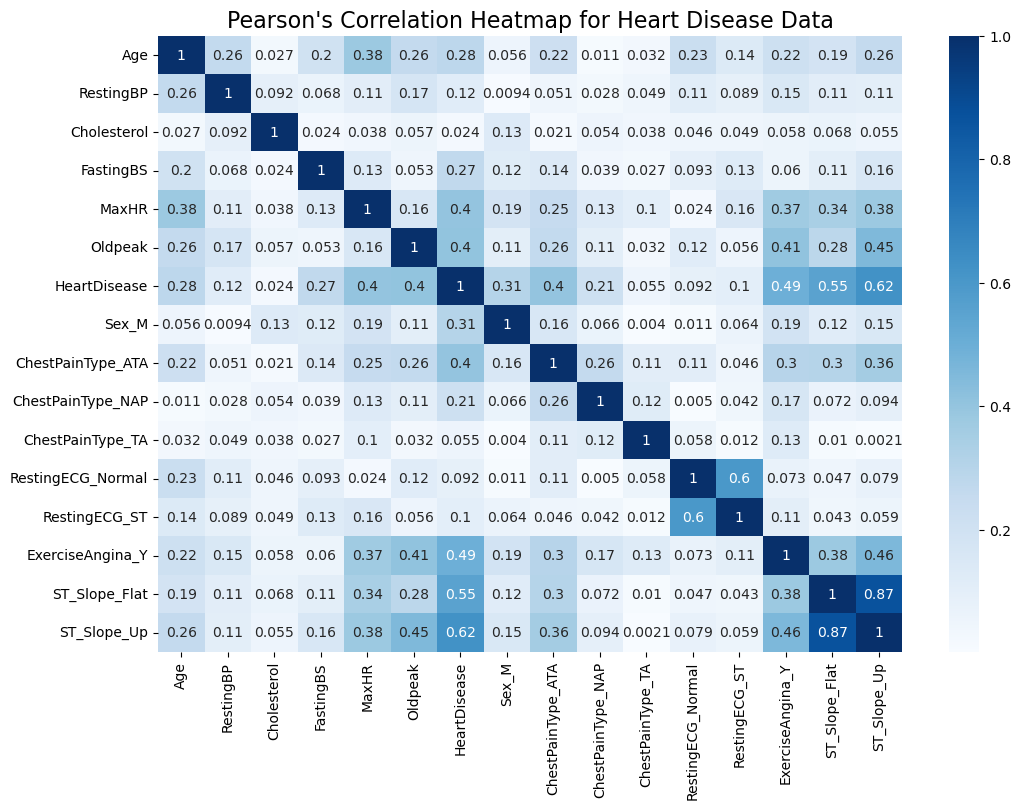

In [33]:
# Create heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='Blues')
plt.title("Pearson's Correlation Heatmap for Heart Disease Data", fontsize=16)
plt.show()

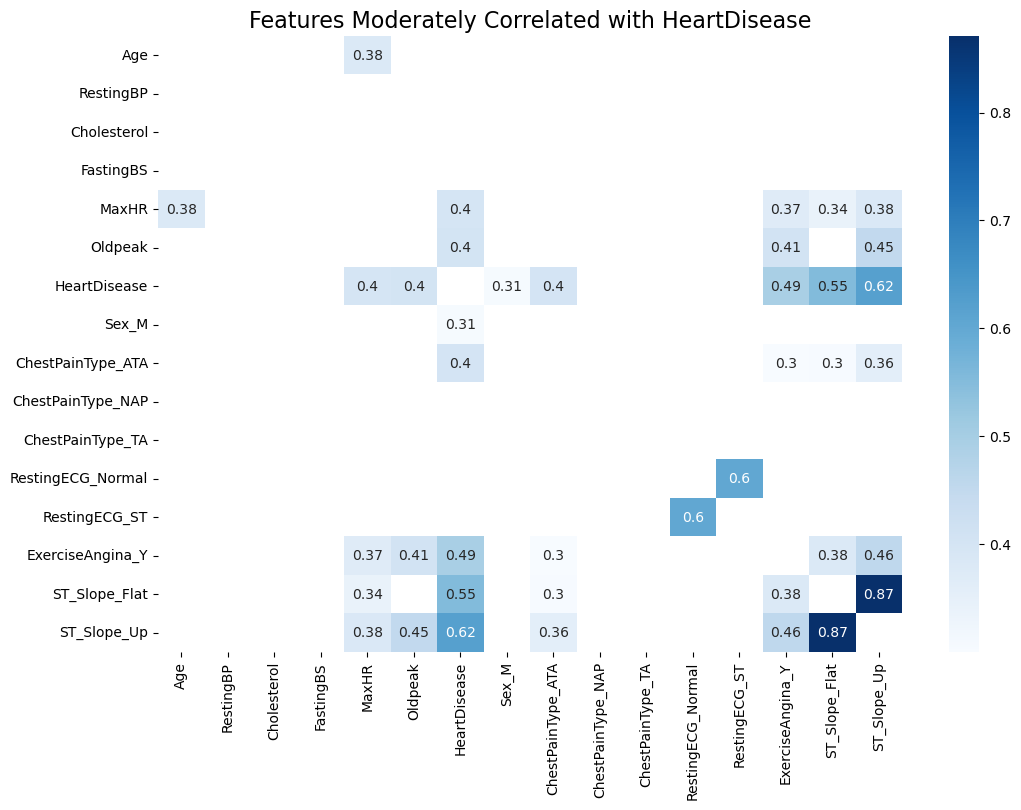

In [34]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat[(corr_mat > 0.3) & (corr_mat < 1)], annot=True, cmap='Blues')
plt.title('Features Moderately Correlated with HeartDisease', size=16)
plt.show()

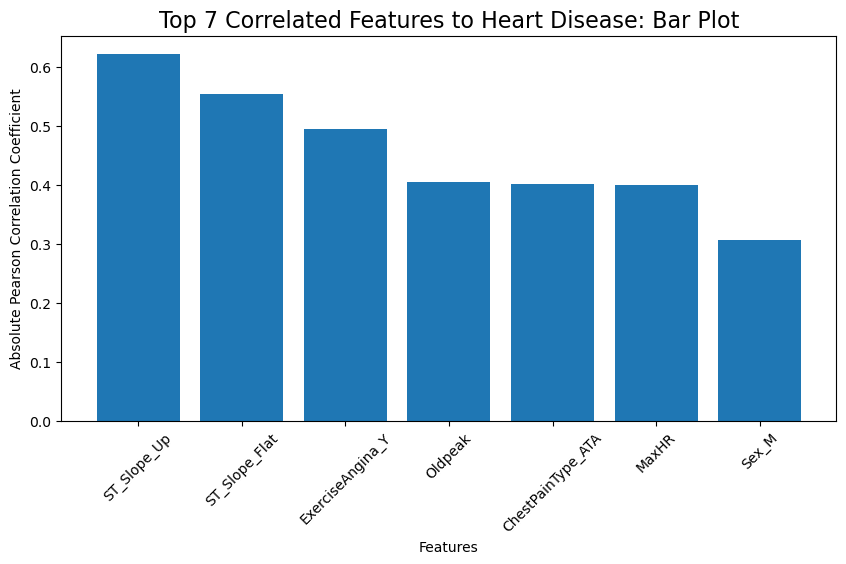

In [35]:
# Select top 7 features using square of the Pearson correlation
top_7_features = (corr_mat['HeartDisease'] ** 2).sort_values(ascending=False)[1:8].index.tolist()

# Create bar plot
plt.figure(figsize=(10, 5))
plt.bar(x=top_7_features, height=corr_mat.loc[top_7_features, 'HeartDisease'])
plt.xticks(rotation=45)
plt.title('Top 7 Correlated Features to Heart Disease: Bar Plot', fontsize=16)
plt.ylabel('Absolute Pearson Correlation Coefficient')
plt.xlabel('Features')
plt.show()

## Building a Classifier I

From our correlation heat map, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to HeartDisease:

Oldpeak
We could also select MaxHR or ChestPainType_ATA.
Sex_M
It has a relatively low value for the coefficient, but given what we observed in our EDA, let's also take it into account.
ExerciseAngina_Y
ST_Slope_Flat
ST_Slope_Up
The correlation coefficient threshold was chosen based on what made sense when looking at the heat map. We encourage you to experiment with the threshold and select features accordingly.

Surprisingly, Cholesterol is not strongly correlated to HeartDisease. We can consider ignoring the feature for now.

Given everything we have attempted so far, we can narrow down the features that might be relevant. We recommend you identify those features yourself before moving forward.

Next, we will create and train multiple models using one of those features at a time.

In [56]:
X = heart_clean_df.drop('HeartDisease', axis = 1)
y = heart_clean_df['HeartDisease']


sel_features = ['Oldpeak', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'  ]


# Create list of test sizes to experiment with
test_sizes = [0.10, 0.15, 0.20, 0.25]

# Create dictionary of dictionaries to store results
results = {}

for test_size in test_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                      test_size=test_size,
                                                      random_state=42)
    test_results = {}
    
    for feature in sel_features:
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train[[feature]], y_train )
        
        
        accuracy = knn.score(X_val[[feature]], y_val)
        
        test_results[feature] = round(accuracy, 4)
        
    results[test_size] = test_results

To gain a better understanding of our findings, we can create a DataFrame from the results dictionary. This will allow us to easily view the accuracy scores for each feature set and test size value combination.

In [57]:
results_list = []

# Loop over test size values
for size, features in results.items():
    # Loop over features for current k value
    for feature, accuracy in features.items():
        # Create dictionary with test size, feature and accuracy keys
        result_dict = {'size': size, 'feature': feature, 'accuracy': accuracy}
        # Append to results list
        results_list.append(result_dict)

# Convert list of dictionaries to DataFrame
test_size_df = pd.DataFrame(results_list)
test_size_df

,size,feature,accuracy
0,0.10,Oldpeak,0.7065
1,0.10,Sex_M,0.6630
2,0.10,ExerciseAngina_Y,0.5870
3,0.10,ST_Slope_Flat,0.7174
4,0.10,ST_Slope_Up,0.4130
5,0.15,Oldpeak,0.6667
6,0.15,Sex_M,0.6522
7,0.15,ExerciseAngina_Y,0.6522
8,0.15,ST_Slope_Flat,0.7319
9,0.15,ST_Slope_Up,0.7899


Based on the results, the following findings can be made:

The selected features have different impacts on the accuracy of the KNN classifier. ST_Slope_Up consistently shows the highest accuracy across all test sizes, while Sex_M consistently shows the lowest accuracy.
The optimal test size depends on the selected features. For example, when using the Oldpeak feature, the optimal test size is 0.15, while when using the ST_Slope_Up feature, the optimal test size is 0.25.
Overall, the accuracy of the KNN classifier is relatively low, ranging from 0.413 to 0.8. This suggests that the selected features may not be sufficient to accurately predict heart disease, and other features or more complex models may be necessary.
It is important to note that the results obtained may be sensitive to the number of neighbors (n_neighbors) used in the KNN classifier. Therefore, to obtain reliable results, it is recommended to run the analysis multiple times with different values of n_neighbors and compare the results.
Based on the given results, a test size of 0.15 or 0.2 may be a good choice to balance the trade-off between variance and bias.
We have decided to proceed with a test size of 0.15 for our experiments. Our next step will be to explore different values of n_neighbors in order to determine the optimal value for our model.~


In [58]:
# Split data into training (85%) and validation (15%)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.15,
                                                  random_state=42)

# List of k values (n_neighbors)
k_values = [1, 3, 5, 7, 10]

# Create dictionary of dictionaries to store results
results = {}

# Loop over k values
for value in k_values:
    
    # Create dictionary to store results for currect k value
    test_results = {}
    
    # Loop over selected features
    for feature in sel_features:
        # Fit knn classifier with current feature set
        knn = KNeighborsClassifier(n_neighbors=value)
        knn.fit(X_train[[feature]], y_train)
        
        # Evaluate accuracy on validation set
        accuracy = knn.score(X_val[[feature]], y_val)
        
        # Store accuracy in test_results dictionary
        test_results[feature] = round(accuracy, 4)
        
    # Store results from current k value in main dictionary
    results[value] = test_results

In [59]:
# Create list to store dictionaries
results_list = []

# Loop over k values
for k, features in results.items():
    # Loop over features for current k value
    for feature, accuracy in features.items():
        # Create dictionary with k, feature and accuracy keys
        result_dict = {'n_neighbor': k, 'feature': feature, 'accuracy': accuracy}
        # Append to results list
        results_list.append(result_dict)

# Convert list of dictionaries to DataFrame
k_values_df = pd.DataFrame(results_list)
k_values_df

,n_neighbor,feature,accuracy
0,1,Oldpeak,0.5870
1,1,Sex_M,0.6522
2,1,ExerciseAngina_Y,0.6522
3,1,ST_Slope_Flat,0.7319
4,1,ST_Slope_Up,0.5942
5,3,Oldpeak,0.6667
6,3,Sex_M,0.6522
7,3,ExerciseAngina_Y,0.6522
8,3,ST_Slope_Flat,0.7319
9,3,ST_Slope_Up,0.7899


Based on our experiments, we have found that the accuracy of the k-Nearest Neighbors model varies with different values of n_neighbors. However, the improvement in accuracy is not significant for some values of n_neighbors. Therefore, we recommend selecting the default value of k, which is 5, for n_neighbors.

As we can see from the table, the accuracy scores for some values of n_neighbors are similar, indicating that increasing n_neighbors does not improve the model's performance significantly.

## Building a Classifier II

In [61]:
# Split data for training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X[sel_features], y,
                                                  test_size=0.15,
                                                  random_state=42)


# Instantiate scaler
scaler = MinMaxScaler()

# Fit and transform selected features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform same features in the validation set
X_val_scaled = scaler.transform(X_val)

# Fit the model on scaled features (using default n_neighbors value)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Evaluate the model on scaled features
accuracy = knn.score(X_val_scaled, y_val)

print(f'Model accuracy: {accuracy*100:.2f}%')

Model accuracy: 75.36%


In the previous experiment, an accuracy of 78.99% was achieved with the feature ST_Slope_Up using a 15% test size split. However, when all selected features were scaled and used together to train the model, the accuracy decreased to 75.36%. This suggests that the selected features have varying levels of importance and may not contribute equally to the performance of the model.

## Hyperparameter Tuning

Now that we have a reasonably well-performing model, we can experiment with the parameters and hyperparameters. We'll use GridSearchCV to search over those values.

GridSearchCV, as we know, allows us to search over all the parameters for our classifier in scikit-learn. For example, for the KNeighborsClassifier we can choose to experiment with the following:

n_neighbors,
weights,
metric and more.
Additionally, since GridSearchCV creates a validation set as part of its process, we'll have to update our workflow a bit.

In [62]:
# Split data into training (85%) and test (15%)
X_train, X_test, y_train, y_test = train_test_split(X[sel_features], y,
                                                    test_size=0.15,
                                                    random_state=42)

# List of selected features
sel_features = [
                'Oldpeak',
                'Sex_M',
                'ExerciseAngina_Y',
                'ST_Slope_Flat',
                'ST_Slope_Up'
]

# Instantiate scaler
scaler = MinMaxScaler()

# Scale training set
X_train_scaled = scaler.fit_transform(X_train)

In [63]:
# Define the parameter grid for GridSearchCV
params = {'n_neighbors': list(range(1,21)),
          'weights': ['uniform', 'distance'],
          'metric': ['minkowski', 'manhattan']}

# Instantial model
knn = KNeighborsClassifier()

# Create GridSearchCV instance
knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')

# Fit the instance (knn_grid)
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [64]:
# Get best score and best parameters
best_score = knn_grid.best_score_
best_params = knn_grid.best_params_

print(f'Best score: {best_score*100:0.2f}%')
print(f'Best parameters: {best_params}')

Best score: 85.64%
Best parameters: {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}


The GridSearchCV results indicate that the best KNN classifier achieved an accuracy of 85.64% with a Minkowski distance metric, 8 neighbors, and uniform weighting. These hyperparameters proved to be effective for this classification task, demonstrating a significant improvement in accuracy compared to previous experiments. Overall, these results suggest that the KNN classifier model is a promising approach for this task.~

## Model Evaluation on Test Set

In [65]:
# Scale same features from the test set
X_test_scaled = scaler.transform(X_test)

# Get the best estimator to make predictions
best_model = knn_grid.best_estimator_

# Make predictions on test set
predictions = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'{accuracy*100:.2f}%')

74.64%
